# Project Overview
-----

Zomato is an mobile and web app used by foodies to find good restaurants in a ever-growing number of cities around the world. Users of the app can find a restuarant by a multitide of filters and submit ratings, review and pictures of their experience at the establishment. 

The intention of this analysis is to use data provided by the Zomato API to understand trends among restaurants in Cape Town specifically. 

It is hoped that this analysis will allow hidden gems to be dsicovered through the use of aggregated data. In adddition, restaurateurs may use this info to understand, at least partially, the relationship between ratings, location, cuisine types and price points.

## Limitations of the Analysis

- It was intended to obtain a listing of all the reataurants in Cape Town, however the Zomato Search API limits you to 100 restaurants per search criteria. However with some trickery I was able to create two data sets - the top 100 restaurants by aggregated rating for each establishment type in Cape Town and the bottom 100 restaurants by aggregated rating for each establishment type in Cape Town. This means that although not every restaurant in Cape Town is included in the analysis, the bulk of the best and worst are, which should make the analysis insightful enough. 

- I was not able to access restaurant reviews, review counts, review sentiments, comments, pictures or picture counts from the API as one needs to be a Zomato Partner in order to do this. 

- Although rating's provided by restaurant patrons provide useful info about the combination of food, service and ambience as a whole, there is no way to extract specific details about each of these elements of the experience (at this time).

## Table of Contents

[Data Cleaning and Preparation](#Data-Cleaning-and-Preparation)





# Data Cleaning and Preparation
----

## Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
top100 = pd.read_csv('Processed/zomato-cape-town-top100.csv')
bottom100 = pd.read_csv('Processed/zomato-cape-town-bottom100.csv')

## Data Cleaning Analysis

In [3]:
top100.head()

,name,cuisines,aggregate_rating,rating_text,votes,currency,average_cost_for_two,price_range,locality,city,latitude,longitude,has_online_delivery,is_delivering_now,has_table_booking
0,Moro Gelato,"Desserts, Ice Cream",4.8,Excellent,67,R,80,1,CBD,Cape Town,-33.924108,18.417317,0,0,0
1,Unframed Ice Cream,Ice Cream,4.7,Excellent,102,R,40,1,Gardens,Cape Town,-33.928691,18.412097,0,0,0
2,The Velvet Cake Co.,"Bakery, Desserts",4.6,Excellent,87,R,165,2,CBD,Cape Town,-33.919300,18.421512,0,0,0
3,My Sugar,"Cafe, Patisserie, Bakery, Desserts",4.5,Excellent,195,R,125,2,Sea Point,Cape Town,-33.921692,18.382759,0,0,0
4,The Creamery,"Desserts, Ice Cream",4.5,Excellent,388,R,110,2,Newlands,Cape Town,-33.970286,18.461950,0,0,0


In [4]:
top100.shape

(985, 15)

In [5]:
top100.dtypes

name                     object
cuisines                 object
aggregate_rating        float64
rating_text              object
votes                     int64
currency                 object
average_cost_for_two      int64
price_range               int64
locality                 object
city                     object
latitude                float64
longitude               float64
has_online_delivery       int64
is_delivering_now         int64
has_table_booking         int64
dtype: object

In [6]:
top100["cuisines"].value_counts()

Drinks Only                                                                                98
Desserts                                                                                   47
Cafe, Bakery                                                                               41
Cafe                                                                                       40
Desserts, Ice Cream                                                                        28
Finger Food                                                                                21
European                                                                                   20
Bakery, Desserts                                                                           19
African                                                                                    17
Pizza                                                                                      15
Cafe, Desserts                                              

In [7]:
top100["locality"].value_counts()

CBD                                             117
Stellenbosch                                     78
Gardens                                          44
Sea Point                                        36
Franschhoek                                      33
Green Point                                      32
Kenilworth                                       27
Durbanville                                      25
Somerset West                                    22
Claremont                                        20
Bellville                                        19
V & A Waterfront                                 18
Victoria Wharf, V & A Waterfront                 17
Woodstock                                        17
Table View                                       17
Constantia                                       16
Observatory                                      15
Canal Walk Mall, Century City                    15
Hermanus                                         14
Paarl       

In [8]:
top100["currency"].value_counts()

R    985
Name: currency, dtype: int64

In [9]:
top100["has_online_delivery"].value_counts()

0    985
Name: has_online_delivery, dtype: int64

In [10]:
top100["is_delivering_now"].value_counts()

0    985
Name: is_delivering_now, dtype: int64

In [11]:
top100["has_table_booking"].value_counts()

0    982
1      3
Name: has_table_booking, dtype: int64

In [12]:
top100["price_range"].value_counts()

4    337
2    290
3    234
1    124
Name: price_range, dtype: int64

In [13]:
top100["rating_text"].value_counts()

Good         352
Average      303
Very Good    214
Not rated     89
Excellent     24
Poor           3
Name: rating_text, dtype: int64

In [14]:
top100.isnull().sum()

name                    0
cuisines                0
aggregate_rating        0
rating_text             0
votes                   0
currency                0
average_cost_for_two    0
price_range             0
locality                0
city                    0
latitude                0
longitude               0
has_online_delivery     0
is_delivering_now       0
has_table_booking       0
dtype: int64

In [15]:
bottom100.head()

,name,cuisines,aggregate_rating,rating_text,votes,currency,average_cost_for_two,price_range,locality,city,latitude,longitude,has_online_delivery,is_delivering_now,has_table_booking
0,KFC,Desserts,2.4,Poor,6,R,80,1,"Canal Walk Mall, Century City",Cape Town,-33.892667,18.510500,0,0,0
1,Milky Lane,"Desserts, Ice Cream",2.6,Average,15,R,80,1,"Cavendish Square, Claremont",Cape Town,-33.980120,18.463156,0,0,0
2,Wakaberry,Desserts,2.6,Average,10,R,80,1,"Somerset Mall, Somerset West",Cape Town,-34.082219,18.823654,0,0,0
3,Marcel's Frozen Yoghurt,Desserts,2.6,Average,16,R,100,2,"Tygervalley Shopping Centre, Bellvile",Cape Town,-33.888199,18.633909,0,0,0
4,Waffle Mania,Desserts,2.6,Average,5,R,120,2,"Canal Walk Mall, Century City",Cape Town,-33.892667,18.510667,0,0,0


In [16]:
bottom100.shape

(985, 15)

In [17]:
bottom100.dtypes

name                     object
cuisines                 object
aggregate_rating        float64
rating_text              object
votes                     int64
currency                 object
average_cost_for_two      int64
price_range               int64
locality                 object
city                     object
latitude                float64
longitude               float64
has_online_delivery       int64
is_delivering_now         int64
has_table_booking         int64
dtype: object

In [18]:
bottom100["cuisines"].value_counts()

Drinks Only                                                                                  161
Cafe                                                                                          72
Fast Food                                                                                     44
Desserts                                                                                      44
Cafe, Bakery                                                                                  33
Desserts, Ice Cream                                                                           28
Finger Food                                                                                   23
Bakery, Desserts                                                                              19
Pizza                                                                                         18
Cafe, Bakery, Desserts                                                                        16
African                       

In [19]:
bottom100["locality"].value_counts()

CBD                                         77
Stellenbosch                                69
Sea Point                                   35
Franschhoek                                 35
Kenilworth                                  30
Hermanus                                    26
Canal Walk Mall, Century City               25
Bellville                                   25
Gardens                                     24
Durbanville                                 21
Green Point                                 20
V & A Waterfront                            20
Observatory                                 18
Somerset West                               18
Victoria Wharf, V & A Waterfront            17
Paarl                                       16
Table View                                  16
Grandwest Casino, Goodwood                  15
Woodstock                                   14
Claremont                                   13
Robertson                                   13
Rondebosch   

In [20]:
bottom100["currency"].value_counts()

R    985
Name: currency, dtype: int64

In [21]:
bottom100["has_online_delivery"].value_counts()

0    985
Name: has_online_delivery, dtype: int64

In [22]:
bottom100["is_delivering_now"].value_counts()

0    985
Name: is_delivering_now, dtype: int64

In [23]:
bottom100["has_table_booking"].value_counts()

0    983
1      2
Name: has_table_booking, dtype: int64

In [24]:
bottom100["price_range"].value_counts()

2    350
4    261
3    225
1    149
Name: price_range, dtype: int64

In [25]:
bottom100["rating_text"].value_counts()

Average      659
Good         118
Poor          96
Not rated     93
Very Good     12
Excellent      7
Name: rating_text, dtype: int64

In [26]:
bottom100.isnull().sum()

name                    0
cuisines                0
aggregate_rating        0
rating_text             0
votes                   0
currency                0
average_cost_for_two    0
price_range             0
locality                0
city                    0
latitude                0
longitude               0
has_online_delivery     0
is_delivering_now       0
has_table_booking       0
dtype: int64

## Observations
- Multiple cuisine types can be specified per restaurant. These should be seperated thoughtfully so that filtering by single cuisine type will be possible. Dummy columns for each cuisine type will be created using True/False values for each. This adds a lot of columns to the data set but allows us to be more precise with filtering. It might also allow us to investigate whether having multiple cusine types on your Zomato listing contrinutes to your aggregate rating or some other measure. A column will be added to store the number of cuisine types on offer.
- Restarants that serve "Drinks Only" account for the highest number of establishments yet they may skew the data thus in certain instances, they will not be included in an investigation.
- "Locality" includes suburb names but also specific places of interest within certain suburbs, such as shopping malls. A new column will be created to maintain this extra info and the "Locality" column will be changed to show the suburb name only. This will allow us to filter on specific suburbs as a whole but also seperate out larger public spaces that have many restuarants such as the V&A Waterfront. 
- In addition to splitting suburb and places of interest, we may want to add a field showing the larger region that a suburb forms part of it. This will make aggregated and visualisation easier. 
- Restaurants that have a high or low aggregate rate based on a larger number of votes carry more useful info than restaurants whose aggregate rating comes from a few votes, hence a weighting factor column will be created so that restaurants with fewer votes will not be penalised unfairly. Restaurants that have received zero ratings will not be included in any ratings investigations however their locality, price range and average cost for two variables will be considered in other analysis. 
- Currency column contains "R" only, as expected, so can be removed from analysis. 
- "has_online_delivery" and "is_delivering_now" contains only 0, therefore they don't influence the analysis and will be removed. 
- "has_table_booking" is all 0's except for 3 restaurants in top 100 list and 2 in the bottom 100, therefore will be removed as well. 
- Rows from top and bottom data sets will be merged. This will lead to some duplicates which must be removed.
- There are no missing values in either data set

## Data Preparation

### Removing unneccessary columns from datasets

In [27]:
cols = ['name', 'cuisines', 'aggregate_rating', 'rating_text', 'votes',
       'average_cost_for_two', 'price_range', 'locality', 'city',
       'latitude', 'longitude']
top100 = top100[cols]
top100.head()

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,longitude
0,Moro Gelato,"Desserts, Ice Cream",4.8,Excellent,67,80,1,CBD,Cape Town,-33.924108,18.417317
1,Unframed Ice Cream,Ice Cream,4.7,Excellent,102,40,1,Gardens,Cape Town,-33.928691,18.412097
2,The Velvet Cake Co.,"Bakery, Desserts",4.6,Excellent,87,165,2,CBD,Cape Town,-33.919300,18.421512
3,My Sugar,"Cafe, Patisserie, Bakery, Desserts",4.5,Excellent,195,125,2,Sea Point,Cape Town,-33.921692,18.382759
4,The Creamery,"Desserts, Ice Cream",4.5,Excellent,388,110,2,Newlands,Cape Town,-33.970286,18.461950


In [28]:
bottom100 = bottom100[cols]
bottom100.head()

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,longitude
0,KFC,Desserts,2.4,Poor,6,80,1,"Canal Walk Mall, Century City",Cape Town,-33.892667,18.510500
1,Milky Lane,"Desserts, Ice Cream",2.6,Average,15,80,1,"Cavendish Square, Claremont",Cape Town,-33.980120,18.463156
2,Wakaberry,Desserts,2.6,Average,10,80,1,"Somerset Mall, Somerset West",Cape Town,-34.082219,18.823654
3,Marcel's Frozen Yoghurt,Desserts,2.6,Average,16,100,2,"Tygervalley Shopping Centre, Bellvile",Cape Town,-33.888199,18.633909
4,Waffle Mania,Desserts,2.6,Average,5,120,2,"Canal Walk Mall, Century City",Cape Town,-33.892667,18.510667


### Merge data sets and remove duplicates

In [29]:
data = pd.concat([top100, bottom100], axis=0)
data.shape

(1970, 11)

In [30]:
data[data.duplicated(subset=["name", "locality"])]

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,longitude
87,N' Ice,"Ice Cream, Desserts",0.0,Not rated,1,70,1,Strand,Cape Town,-34.114265,18.822527
148,Vida E Caffe,"Cafe, Desserts",3.3,Average,17,150,2,Gardens,Cape Town,-33.929000,18.411833
160,Kauai,"Healthy Food, Fast Food",3.3,Average,11,200,3,CBD,Cape Town,-33.922833,18.420833
299,The Fat Cactus,"Mexican, Finger Food, Tex-Mex",4.1,Very Good,410,300,4,Gardens,Cape Town,-33.928833,18.410833
301,Rick's Cafe Americain,"Moroccan, Grill, Seafood, Burger, Finger Food",3.9,Good,267,320,4,Gardens,Cape Town,-33.928372,18.410481
302,Bombay Bicycle Club,"Mediterranean, Steak, Finger Food",3.9,Good,277,450,4,Gardens,Cape Town,-33.936626,18.404738
303,Beerhouse on Long,"Grill, German",3.9,Good,301,300,4,CBD,Cape Town,-33.925512,18.415936
500,Warwick Wine Estate,"South African, Mediterranean, Cafe",4.6,Excellent,104,440,4,Stellenbosch,Cape Town,-33.840835,18.864158
502,My Sugar,"Cafe, Patisserie, Bakery, Desserts",4.5,Excellent,195,125,2,Sea Point,Cape Town,-33.921692,18.382759
504,The Velvet Cake Co.,"Cafe, Desserts, Bakery",4.4,Very Good,126,160,2,Bellville,Cape Town,-33.868301,18.641180


In [31]:
data.duplicated(subset=["name", "locality"]).sum()

611

In [32]:
# duplicates are considerd those restaurants with the same name in the same location. Keep the first instance.
data = data.drop_duplicates(subset=["name", "locality"], keep='first')
data.shape

(1359, 11)

In [33]:
data.duplicated(subset=["name", "locality"]).sum()

0

### Create new columns from existing data

In [34]:
# Values in cuisine columns may have multiple values with ',' seperator
# Extract each possible cuisine type then ensures each dummy column is prefixed with "cuisine_"

dummies = data['cuisines'].str.get_dummies(sep=", ")
dummies.columns = ["cuisine_" + str(col) for col in dummies.columns]
data = pd.concat([data, dummies], axis=1)
data.sample(10)

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,...,cuisine_Steak,cuisine_Street Food,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese
653,Carlyles on Derry,"Italian, Burger, Beverages, Finger Food, Grill...",3.5,Good,56,260,3,Vredehoek,Cape Town,-33.938215,...,0,0,0,1,0,0,0,0,0,0
810,The Martini - The Cellars Hohenort,Drinks Only,3.3,Average,8,200,3,"The Cellars-Hohenhort, Constantia",Cape Town,-34.002223,...,0,0,0,0,0,0,0,0,0,0
139,Southern Fried Chicken,"Burger, Fast Food, Grill",2.5,Average,9,140,2,CBD,Cape Town,-33.919856,...,0,0,0,0,0,0,0,0,0,0
497,The Country Kitchen at Mont Rochelle,"South African, Contemporary",3.6,Good,17,600,4,Franschhoek,Cape Town,-33.918723,...,0,0,0,0,0,0,0,0,0,0
825,Cumba's,"Grill, Seafood",0.0,Not rated,0,200,3,De Waterkant,Cape Town,-33.920218,...,0,0,0,0,0,0,0,0,0,0
447,La Perla,"Italian, Seafood",3.4,Average,125,400,4,Sea Point,Cape Town,-33.918667,...,0,0,0,0,0,0,0,0,0,0
193,Bello Pizza,Pizza,2.7,Average,13,170,2,Kuilsriver,Cape Town,-33.935283,...,0,0,0,0,0,0,0,0,0,0
251,Buena Vista,"Mexican, Cuban",2.5,Average,43,300,4,"Eden On The Bay Centre, Blouberg",Cape Town,-33.792344,...,0,0,0,0,0,0,0,0,0,0
49,Wakaberry,Desserts,3.0,Average,5,80,1,Stellenbosch,Cape Town,-33.938048,...,0,0,0,0,0,0,0,0,0,0
444,The Newlands Cafe - Southern Sun Newlands,"Cafe, Grill, African",3.3,Average,8,350,4,"Southern Sun Newlands, Newlands",Cape Town,-33.975311,...,0,0,0,0,0,0,0,0,0,0


In [35]:
data.shape

(1359, 83)

In [36]:
# Go through each row and extract a places from the locality if one is specified
# Store the place and locality seperately in order to filter more precisely

places = []
localities = []
def split_locality(row):
    items = row["locality"].split(',')
    if len(items) > 1:
        places.append(items[0])
        localities.append(items[1].strip())
    else:
        places.append("None")
        localities.append(items[0].strip())
        
       
data.apply(split_locality, axis=1)
data["places"] = places
data["locality"] = localities
data[["locality", "places"]].sample(10)

,locality,places
182,Claremont,None
525,De Waterkant,None
515,Bellville,None
526,Woodstock,None
318,Green Point,None
456,Century City,None
198,Bellville,None
206,V & A Waterfront,None
221,Franschhoek,Babylonstoren Wine Estate
489,V & A Waterfront,None


### Fix localities incorrectly entered into Zomato
A number of localities were found with spelling mistakes leading to an incorrect representation of the data. While we could exclude these I would rather try fix them manually so as to keep as much data as possible for the analysis. 

In [37]:
mapping = {
    "Dubanville": "Durbanville",
    "Contantia": "Constantia",
    "Tableview": "Table View",
    "Belville":"Bellville",
    "Belvile":"Bellville",
    "Bellvile":"Bellville",
    "V&A Waterfront":"V & A Waterfront",
    "The Woodstock Exchange. Woodstock": "Woodstock",
    "Franschoek":"Franschhoek",
    "Somersetwest":"Somerset West",
    "Kuilsriver":"Kuils River",
    "Greenpoint":"Green Point",
    "Ridgeback Wine Farm": "Paarl",
    "Anura": "Stellenbosch",
    "Hannover": "Hanover Park",
    "NH The Lord Charles Hotel": "Somerset West",
    "Fairbridge Mall": "Brackenfell",
    "Blouberg": "Bloubergstrand",
    "Two Oceans Beach": "Mouille Point",
}

def correct_incorrect_localities(col):
    if col in mapping:
        return mapping.get(col, 'None')
    else:
        return col
    
#data["locality"] = data["locality"].apply(correct_incorrect_localities)

# If no mapping provided, return x
f = lambda x: mapping.get(x, x)
data.locality = data.locality.map(f)



In [38]:
data[data["locality"] == "Two Oceans Beach"]

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,...,cuisine_Street Food,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese,places


### Adding a region column to visualise larger geographical areas in the data
A scraper was built to obtain a list of Cape Town suburbs and their wider regions from https://en.wikipedia.org/wiki/List_of_Cape_Town_suburbs. The code is available on the projects Github page. First we will import the suburb data, then for each restaurant in our dataset, we will match its locality to this list of suburbs and assign the fitting region to a new column in the main dataset.

In [39]:
suburbs = pd.read_csv("Processed/cape-town-suburbs.csv")
suburbs.sample(10)

,locality,region
58,Kirstenhof,Southern Suburbs
3,Foreshore,City Bowl
17,Bellville,Northern Suburbs
66,Plumstead,Southern Suburbs
121,Atlantis,West Coast
113,Philippi,Cape Flats
33,Parow,Northern Suburbs
37,Bantry Bay,Atlantic Seaboard
51,Constantia,Southern Suburbs
4,Gardens,City Bowl


In [40]:
def match_locality(row):
    suburb = suburbs[suburbs['locality'] == row['locality']]
    if suburb.shape[0] == 1:
        return suburb.iloc[0]['region']
    else:
        return "None"

data["region"] = data.apply(match_locality, axis=1)
data.head(10)

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,...,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese,places,region
0,Moro Gelato,"Desserts, Ice Cream",4.8,Excellent,67,80,1,CBD,Cape Town,-33.924108,...,0,0,0,0,0,0,0,0,None,None
1,Unframed Ice Cream,Ice Cream,4.7,Excellent,102,40,1,Gardens,Cape Town,-33.928691,...,0,0,0,0,0,0,0,0,None,City Bowl
2,The Velvet Cake Co.,"Bakery, Desserts",4.6,Excellent,87,165,2,CBD,Cape Town,-33.919300,...,0,0,0,0,0,0,0,0,None,None
3,My Sugar,"Cafe, Patisserie, Bakery, Desserts",4.5,Excellent,195,125,2,Sea Point,Cape Town,-33.921692,...,0,0,0,0,0,0,0,0,None,Atlantic Seaboard
4,The Creamery,"Desserts, Ice Cream",4.5,Excellent,388,110,2,Newlands,Cape Town,-33.970286,...,0,0,0,0,0,0,0,0,None,Southern Suburbs
5,The Velvet Cake Co.,"Cafe, Desserts, Bakery",4.4,Very Good,126,160,2,Bellville,Cape Town,-33.868301,...,0,0,0,0,0,0,0,0,None,Northern Suburbs
6,The Creamery,"Desserts, Ice Cream",4.2,Very Good,110,110,2,Green Point,Cape Town,-33.904093,...,0,0,0,0,0,0,0,0,None,Atlantic Seaboard
7,The Creamery,"Desserts, Ice Cream",4.1,Very Good,44,75,1,Claremont,Cape Town,-33.981278,...,0,0,0,0,0,0,0,0,None,Southern Suburbs
8,Myog,Desserts,4.1,Very Good,86,100,2,Gardens,Cape Town,-33.931500,...,0,0,0,0,0,0,0,0,None,City Bowl
9,Baskin Robbins,"Ice Cream, Desserts",3.9,Good,38,80,1,Century City,Cape Town,-33.893985,...,0,0,0,0,0,0,0,0,Canal Walk Mall,None


In [41]:
# We need to manually add suburbs that are part of the wider Cape Town region including Winelands etc.
# We could exclude these entries from the analysis but we'd then be excluding areas such as Stellenbosch and Franshoek which are know food mecca's in Cape Town.

mapping = {
    "CBD":"City Bowl",
    "Century City":"Northern Suburbs",
    "Paarl":"Winelands",
    "Stellenbosch":"Winelands",
    "V & A Waterfront":"Atlantic Seaboard",
    "Bay Area":"South Peninsula",
    "Franschhoek": "Winelands",
    "Riebeek Kasteel":"West Coast",
    "Gordons Bay":"Helderberg",
    "Hermanus":"Overberg",
    "Robertson":"Winelands",
    "Wellington":"Winelands",
    "Woodstock": "City Bowl",
    "Noordhoek":"South Peninsula",
    "Worcester":"Winelands",
    "Zonnebloem": "City Bowl",
    "Rylands":"Cape Flats",
    "Malmesbury": "West Coast",
    "Darling": "West Coast",
    "Sunningdale":"Northern Suburbs",
    "Cape Town International Airport":"Northern Suburbs",
    "Neelsie Student Centre": "Winelands",
    "Scarborough": "South Peninsula"
}


def map_locality_to_region(row):
    if row['region'] == 'None':
        return mapping.get(row['locality'], 'None')
    else:
        return row['region']
    

data["region"] = data.apply(map_locality_to_region, axis=1)
data[data["region"] == "None"]

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,...,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese,places,region
465,Two Oceans Restaurant,Seafood,3.8,Good,53,570,4,Cape Point,Cape Town,-34.356368,...,0,0,0,0,0,0,0,0,None,None


In [42]:
data = data.drop(data.index[data["region"] == "None"].tolist())
data[data["region"] == "None"]

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,...,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese,places,region


In [43]:
data.sample(50)

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,...,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese,places,region
233,Anatoli,"Turkish, Middle Eastern",4.2,Very Good,81,400,4,Green Point,Cape Town,-33.914823,...,0,0,0,0,0,1,0,0,None,Atlantic Seaboard
434,The Famous Butcher's Grill - Cape Town Lodge,Steak,3.3,Average,52,498,4,CBD,Cape Town,-33.922319,...,0,0,0,0,0,0,0,0,None,City Bowl
9,Baskin Robbins,"Ice Cream, Desserts",3.9,Good,38,80,1,Century City,Cape Town,-33.893985,...,0,0,0,0,0,0,0,0,Canal Walk Mall,Northern Suburbs
53,Marcel's Frozen Yoghurt,Desserts,3.0,Average,4,100,2,Somerset West,Cape Town,-34.082730,...,0,0,0,0,0,0,0,0,None,Helderberg
393,Castle Bar,Steak,2.7,Average,2,180,2,CBD,Cape Town,-33.931667,...,0,0,0,0,0,0,0,0,None,City Bowl
404,Greenhouse - The Cellars Hohenort,European,4.4,Very Good,81,1450,4,Constantia,Cape Town,-34.002226,...,0,0,0,0,0,0,0,0,The Cellars-Hohenhort,Southern Suburbs
614,Jo'burg,Drinks Only,2.7,Average,5,200,3,CBD,Cape Town,-33.925848,...,0,0,0,0,0,0,0,0,None,City Bowl
688,Woodstock Gin Co,Drinks Only,3.1,Average,7,60,1,Woodstock,Cape Town,-33.928129,...,0,0,0,0,0,0,0,0,None,City Bowl
255,Pizza Vesuvio,"Italian, Pizza",4.0,Very Good,120,370,4,Bellville,Cape Town,-33.876448,...,0,0,0,0,0,0,0,0,None,Northern Suburbs
690,Eikendal Vineyards,Drinks Only,3.1,Average,8,250,3,Stellenbosch,Cape Town,-34.012068,...,0,0,0,0,0,0,0,0,None,Winelands


### Adding a column to store the count of cuisines types offered

In [44]:
data.shape

(1358, 85)

In [45]:
def count_cuisines(row):
    count = len([col for col in data.columns if 'cuisine_' in col if row[col] == True])    
    return count

data["cuisine_count"] = data.apply(count_cuisines, axis=1)
data.sample(5)

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,...,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese,places,region,cuisine_count
943,Vlambojant,"Beverages, Fast Food",0.0,Not rated,1,100,2,Neelsie Student Centre,Cape Town,-33.932627,...,0,0,0,0,0,0,0,None,Winelands,2
537,Max Bagels,"Cafe, Bakery",4.0,Very Good,66,0,1,CBD,Cape Town,-33.922269,...,0,0,0,0,0,0,0,None,City Bowl,2
688,Woodstock Gin Co,Drinks Only,3.1,Average,7,60,1,Woodstock,Cape Town,-33.928129,...,0,0,0,0,0,0,0,None,City Bowl,1
818,Cloud 9 Rooftop Bar and Venue,Italian,2.6,Average,12,200,3,Tamboerskloof,Cape Town,-33.930039,...,0,0,0,0,0,0,0,None,City Bowl,1
14,The Creamery,"Desserts, Ice Cream",3.7,Good,38,75,1,V & A Waterfront,Cape Town,-33.905351,...,0,0,0,0,0,0,0,None,Atlantic Seaboard,2


In [46]:
data[["cuisines", "cuisine_count"]].sample(10)

,cuisines,cuisine_count
109,Fast Food,1
104,Fast Food,1
678,Drinks Only,1
425,Continental,1
245,"South African, European",2
604,Drinks Only,1
137,Pizza,1
928,"Contemporary, South African",2
673,Drinks Only,1
880,"African, German",2


In [47]:
data.shape

(1358, 86)

### Reordering columns

In [48]:
col_order = ['name', 'aggregate_rating', 'rating_text', 'votes',
       'average_cost_for_two', 'price_range', 'cuisines', 'cuisine_count', 'places', 'locality', 'region', 'city', 'latitude',
       'longitude']
other_cols = [c for c in data.columns if c not in col_order]
data = data[col_order+other_cols]
data.sample(5)

,name,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,cuisines,cuisine_count,places,locality,...,cuisine_Steak,cuisine_Street Food,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese
440,Mondiall Kitchen & Bar,3.9,Good,286,630,4,"Seafood, Mediterranean, Cape Malay, South Afri...",5,None,V & A Waterfront,...,0,0,0,0,0,0,0,0,0,0
676,Bartinney Wine & Champagne Bar,3.4,Average,19,220,3,Finger Food,1,None,Stellenbosch,...,0,0,0,0,0,0,0,0,0,0
791,Nibbly Bits,0.0,Not rated,1,150,2,Bakery,1,Capegate Lifestyle Center,Brackenfell,...,0,0,0,0,0,0,0,0,0,0
670,Bon Courage,3.0,Average,4,40,1,Drinks Only,1,None,Robertson,...,0,0,0,0,0,0,0,0,0,0
263,Camel Rock Restaurant,2.5,Average,13,250,3,Fast Food,1,None,Scarborough,...,0,0,0,0,0,0,0,0,0,0


### Export new csv file post clean up

In [49]:
# Order data by rating desc and export to csv
data.sort_values("aggregate_rating", ascending=False, inplace=False).to_csv('Processed/zomato-cape-town-final.csv', 
                                                                            encoding='utf-8-sig', index=False)

# Exploratory Data Analysis
----

We will investigate the following questions:

- Understand average cost for two by suburb and cuisine type
- Understand aggregate rating by average cost for two, suburb and cuisine type
- Compare top 100 with bottom 100 across cost, suburb and cuisine types
- Hidden gem suburbs that have good ratings at lower cost > What can we learn about these places
- Worst and best rated restaurants > What can we learn about them
- Correlations between all columns, i.e does the number of cuisines offered influence the aggregate rating or cost?
- Overall suburb ratings using rating texts and aggregated ratinngs
- Do restaurants with higher price ranges get more votes?
- Summarise regions by avg price, rating, cuisines etc.

### Useful functions for analysis

In [50]:
def top(df, n=5, column='aggregate_rating'):
    return df.sort_values(by=column)[-n:]

def get_stats(group):
    return {'min': group.min(), 'max': group.max(), 'count': group.count(),'mean': group.mean()}
    

### Grouping and aggregating data for plotting

In [51]:
grouped = data.groupby(['locality', 'price_range'], as_index=False)

rating_functions = ['mean', 'std']
vote_functions = ['mean', 'min', 'max', 'std']

fields = {}
fields['average_cost_for_two'] = 'mean'
fields['aggregate_rating'] = rating_functions
fields['cuisine_count'] = 'mean'
fields['votes'] = vote_functions
for c in data.columns:
    if c.startswith('cuisine_') and c != 'cuisine_count':
        fields[c] = 'sum'

grouped_data = grouped.agg(fields)
grouped_data

locality price_range average_cost_for_two  \
                                                                 mean   
0                            Athlone           1            53.333333   
1                            Athlone           2           140.000000   
2                            Athlone           4           473.000000   
3                           Bay Area           1            45.000000   
4                           Bay Area           2           165.000000   
5                           Bay Area           3           225.000000   
6                           Bay Area           4           500.000000   
7                          Bellville           1            76.666667   
8                          Bellville           2           141.111111   
9                          Bellville           3           233.500000   
10                         Bellville           4           351.111111   
11                         Bergvliet           1             0.000000   
12                         Bergvliet           3           235.000000   
13                    Bloubergstrand           1            80.000000   
14                    Bloubergstrand           2           145.000000   
15                    Bloubergstrand           3           243.333333   
16                    Bloubergstrand           4           354.857143   
17                       Brackenfell           1            70.000000   
18                       Brackenfell           2           145.714286   
19                       Brackenfell           3           212.500000   
20                       Brackenfell           4           350.000000   
21                               CBD           1            44.000000   
22                               CBD           2           152.111111   
23                               CBD           3           226.326531   
24                               CBD           4           390.727273   
25                         Camps Bay           1            80.000000   
26                         Camps Bay           2           125.000000   
27                         Camps Bay           3           235.000000   
28                         Camps Bay           4           547.500000   
29   Cape Town International Airport           2           160.000000   
..                               ...         ...                  ...   
186                       Table View           2           139.166667   
187                       Table View           3           233.076923   
188                       Table View           4           375.000000   
189                    Tamboerskloof           2           160.000000   
190                    Tamboerskloof           3           200.000000   
191                    Tamboerskloof           4           450.000000   
192                            Tokai           1            80.000000   
193                            Tokai           2           140.000000   
194                            Tokai           3           225.000000   
195                            Tokai           4           345.000000   
196                 V & A Waterfront           1            56.875000   
197                 V & A Waterfront           2           126.400000   
198                 V & A Waterfront           3           215.714286   
199                 V & A Waterfront           4           492.025641   
200                        Vredehoek           3           240.000000   
201                       Wellington           1            60.000000   
202                       Wellington           3           240.000000   
203                       Wellington           4           375.000000   
204                        Woodstock           1            52.000000   
205                        Woodstock           2           148.750000   
206                        Woodstock           3           250.000000   
207                        Woodstock           4           752.375000   
208          

In [52]:
quartiles = pd.qcut(data['average_cost_for_two'], q=[0, .4, .8, .97, 1.], labels=['R0 - R180', 'R180 - R350', 'R350 - R600', 'R600+'])
grouped = data.groupby(['locality', quartiles], as_index=True)

rating_functions = ['mean', 'std']
vote_functions = ['mean', 'std']

fields = {}
fields['average_cost_for_two'] = ['mean', 'std']
fields['aggregate_rating'] = rating_functions
fields['cuisine_count'] = 'mean'
fields['votes'] = vote_functions
for c in data.columns:
    if c.startswith('cuisine_') and c != 'cuisine_count':
        fields[c] = 'sum'

grouped_data = grouped.agg(fields)
grouped_data


#locality_grouped = data['aggregate_rating'].groupby(quartiles)
#locality_grouped.apply(get_stats).unstack()

average_cost_for_two  \
                                                                     mean   
locality                        average_cost_for_two                        
Athlone                         R0 - R180                      102.857143   
                                R350 - R600                    473.000000   
Bay Area                        R0 - R180                      125.000000   
                                R180 - R350                    225.000000   
                                R350 - R600                    500.000000   
Bellville                       R0 - R180                      132.758621   
                                R180 - R350                    270.277778   
                                R350 - R600                    410.000000   
Bergvliet                       R0 - R180                        0.000000   
                                R180 - R350                    235.000000   
Bloubergstrand                  R0 - R180                      123.333333   
                                R180 - R350                    285.000000   
                                R350 - R600                    467.000000   
Brackenfell                     R0 - R180                      136.250000   
                                R180 - R350                    250.000000   
CBD                             R0 - R180                      139.270833   
                                R180 - R350                    248.750000   
                                R350 - R600                    450.047619   
                                R600+                          650.500000   
Camps Bay                       R0 - R180                      110.000000   
                                R180 - R350                    270.000000   
                                R350 - R600                    489.375000   
                                R600+                          933.333333   
Cape Town International Airport R0 - R180                      160.000000   
                                R180 - R350                    266.666667   
                                R350 - R600                    473.000000   
Century City                    R0 - R180                      120.416667   
                                R180 - R350                    298.000000   
                                R350 - R600                    438.333333   
Claremont                       R0 - R180                      129.200000   
...                                                                   ...   
Strand                          R0 - R180                       98.000000   
                                R180 - R350                    258.000000   
Sunningdale                     R0 - R180                      128.333333   
                                R180 - R350                    265.000000   
Table View                      R0 - R180                      126.000000   
                                R180 - R350                    245.333333   
                                R350 - R600                    425.000000   
Tamboerskloof                   R0 - R180                      160.000000   
                                R180 - R350                    200.000000   
                                R350 - R600                    450.000000   
Tokai                           R0 - R180                      132.500000   
                                R180 - R350                    260.000000   
                                R350 - R600                    360.000000   
V & A Waterfront                R0 - R180                      109.545455   
                                R180 - R350                    275.625000   
                                R350 - R600                    478.090909   
                                R600+                          721.375000   
Vredehoek                       R180 - R350                    240.000000   
Wellington                      R0 - R180        

In [53]:
#health_data['Guido', 'HR']
#grouped_data['average_cost_for_two']['std']
grouped_data.iloc[:2,:2]

average_cost_for_two           
                                              mean        std
locality average_cost_for_two                                
Athlone  R0 - R180                      102.857143  62.640319
         R350 - R600                    473.000000        NaN

In [54]:
top5_by_locality = data.groupby('locality').apply(top)
top5_by_locality

name  aggregate_rating  \
locality                                                                       
Athlone          154                             Tai Chung               2.6   
                 179                        Aneesa's Foods               2.7   
                 187                         Cape to India               2.7   
                 56                             Milky Lane               2.9   
                 769                        Wembley Bakery               3.0   
Bay Area         107                                Kalkys               3.7   
                 479                             Live Bait               3.7   
                 596                                Lekker               3.7   
                 531                   Olympia Cafe & Deli               4.0   
                 424              Harbour House Restaurant               4.1   
Bellville        583                        Oumeul Bakkery               3.7   
                 463                Arugula Bistro & Bread               3.8   
                 553                         Boston Coffee               3.9   
                 255                         Pizza Vesuvio               4.0   
                 5                     The Velvet Cake Co.               4.4   
Bergvliet        789                            The Pantry               0.0   
                 114                           Bella Pizza               2.4   
                 569                        Lime Tree Cafe               3.8   
Bloubergstrand   333                       The Brazen Head               3.3   
                 682  Inside Sports Lounge and  Restaurant               3.3   
                 321                    Doodles Beachfront               3.4   
                 486                                  Moyo               3.6   
                 590                         Café Blouberg               3.7   
Brackenfell      564                                 Wimpy               2.8   
                 671       Ché Latino Cafe & Havana Lounge               2.9   
                 382                            Bok Lounge               2.9   
                 862                         The Hermitage               3.0   
                 752                      Ons Plaaskombuis               3.2   
CBD              207                 The Cousins Trattoria               4.4   
                 206                      Burger & Lobster               4.4   
...                                                    ...               ...   
Tokai            609                Steenberg Tasting Room               4.0   
V & A Waterfront 219                               Woodies               4.2   
                 414               Baia Seafood Restaurant               4.2   
                 410           Dash - Queen Victoria Hotel               4.3   
                 407                       Nobu - One&Only               4.3   
                 205                      Willoughby & Co.               4.4   
Vredehoek        653                     Carlyles on Derry               3.5   
                 545                     The Sidewalk Cafe               3.9   
Wellington       358                          Gecko Lounge               3.1   
                 884                    Seasons Restaurant               3.1   
                 906                     The Stone Kitchen               3.2   
                 910            Oude Wellington Restaurant               3.2   
                 687    Val Du Charron Wine & Olive Estate               3.3   
Woodstock        542                           The Kitchen               4.0   
                 541                      Rosetta Roastery               4.0   
                 229            StarDust Theatrical Dining               4.2   
                 401                      The Test Kitchen               4.7   
                 400                      The Potluck 

In [55]:
cuisine_count_by_locality_price = data.groupby(['locality', 'price_range']).apply(top, n=3, column='cuisine_count')
cuisine_count_by_locality_price

name  \
locality       price_range                                          
Athlone        1           769                     Wembley Bakery   
                           56                          Milky Lane   
                           80                              Smooch   
               2           154                          Tai Chung   
                           179                     Aneesa's Foods   
                           187                      Cape to India   
               4           244                       Ocean Basket   
Bay Area       1           16                        The Ice Cafe   
               2           127                 Lucky Fish & Chips   
                           107                             Kalkys   
               3           531                Olympia Cafe & Deli   
                           596                             Lekker   
               4           424           Harbour House Restaurant   
                           479                          Live Bait   
Bellville      1           612        5th Avenue Bar & Restaurant   
                           37                      Baskin Robbins   
                           771                     Francor Bakery   
               2           133                               Anat   
                           772                      Limnos Bakers   
                           5                  The Velvet Cake Co.   
               3           204                     Starlite Diner   
                           235                         Panarottis   
                           528                              Wimpy   
               4           273          Bossa Social Cafe and Bar   
                           274                        Lemon Butta   
                           226                               Dros   
Bergvliet      1           789                         The Pantry   
               3           114                        Bella Pizza   
                           569                     Lime Tree Cafe   
Bloubergstrand 1           50                            Met Eish   
...                                                           ...   
Wellington     3           358                       Gecko Lounge   
               4           910         Oude Wellington Restaurant   
                           906                  The Stone Kitchen   
Woodstock      1           688                   Woodstock Gin Co   
                           88                               Beijo   
                           758                    The Aviary Café   
               2           542                        The Kitchen   
                           779                  Fria's Superfoods   
                           330                       The Mash Tun   
               3           649                   Woodstock Lounge   
                           938                        The Taproom   
                           636                   Jamaica Me Crazy   
               4           401                   The Test Kitchen   
                           651           The Stud Burger & Saloon   
                           495  Liberty's - Double Tree by Hilton   
Worcester      1           658                         Nuy Winery   
               2           96             Marcel's Frozen Yoghurt   
Wynberg        2           129                     Aneesa's Foods   
                           159                     Butler's Pizza   
                           698                        Caffe Verdi   
               3           112                        Cosy Corner   
                           114                    Eat out the Box   
                           501                      Four & Twenty   
               4           250     Erawan Thai Restaurant and Bar   
Zonnebloem     1           182                           Chopchop   
               2           705                        Drago

In [56]:
quartiles = pd.qcut(data['average_cost_for_two'], q=[0, .4, .8, .97, 1.], labels=['R0 - R180', 'R180 - R350', 'R350 - R600', 'R600+'])
locality_grouped = data['aggregate_rating'].groupby(quartiles)
locality_grouped.apply(get_stats).unstack()

,count,max,mean,min
average_cost_for_two,,,,
R0 - R180,588.0,4.8,2.761224,0.0
R180 - R350,528.0,4.7,3.162879,0.0
R350 - R600,208.0,4.9,3.532692,0.0
R600+,34.0,4.9,3.852941,2.7


### Exploring correlations

In [57]:
data.corr()['aggregate_rating'].sort_values(ascending=True)

cuisine_Desserts          -0.130083
cuisine_Fast Food         -0.100446
cuisine_Street Food       -0.080400
cuisine_Ice Cream         -0.071471
cuisine_Drinks Only       -0.069334
cuisine_Bakery            -0.068652
cuisine_Brazilian         -0.045490
cuisine_Latin American    -0.041356
cuisine_Lebanese          -0.037330
cuisine_Cape Malay        -0.034196
cuisine_Cuban             -0.031139
cuisine_Chinese           -0.030823
latitude                  -0.030290
cuisine_Patisserie        -0.022796
cuisine_Frozen Yogurt     -0.022185
cuisine_Pakistani         -0.020063
cuisine_Beverages         -0.019996
cuisine_Malaysian         -0.010034
cuisine_Indian            -0.009981
cuisine_Pizza             -0.008180
cuisine_Durban            -0.006529
cuisine_Salad             -0.004504
cuisine_Portuguese        -0.000359
cuisine_Bar Food           0.003408
cuisine_Cafe Food          0.006556
cuisine_Irish              0.007320
cuisine_Fish and Chips     0.009019
cuisine_Pub Food           0

/Users/dorondusheiko/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:850: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


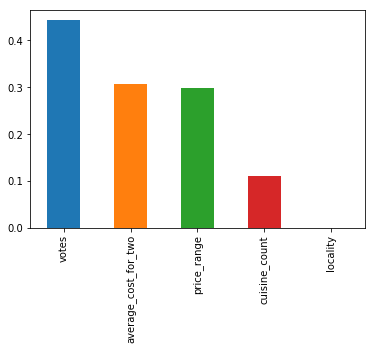

In [58]:
primary_fields = ['votes', 'average_cost_for_two', 'price_range', 'cuisine_count', 'locality']
data.corr()['aggregate_rating'][primary_fields].plot.bar()

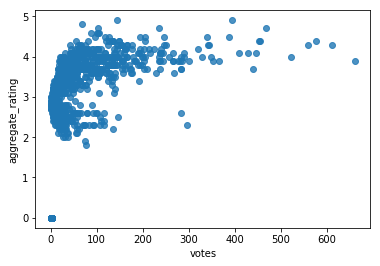

In [59]:
sns.regplot(x=data["votes"], y=data["aggregate_rating"], fit_reg=False)

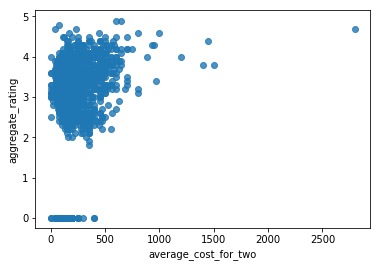

In [60]:
sns.regplot(x=data["average_cost_for_two"], y=data["aggregate_rating"], fit_reg=False)

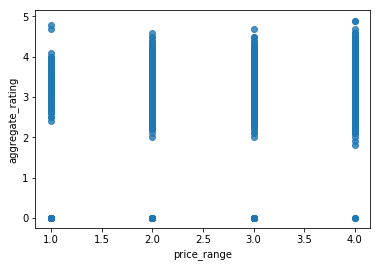

In [61]:
sns.regplot(x=data["price_range"], y=data["aggregate_rating"], fit_reg=False)

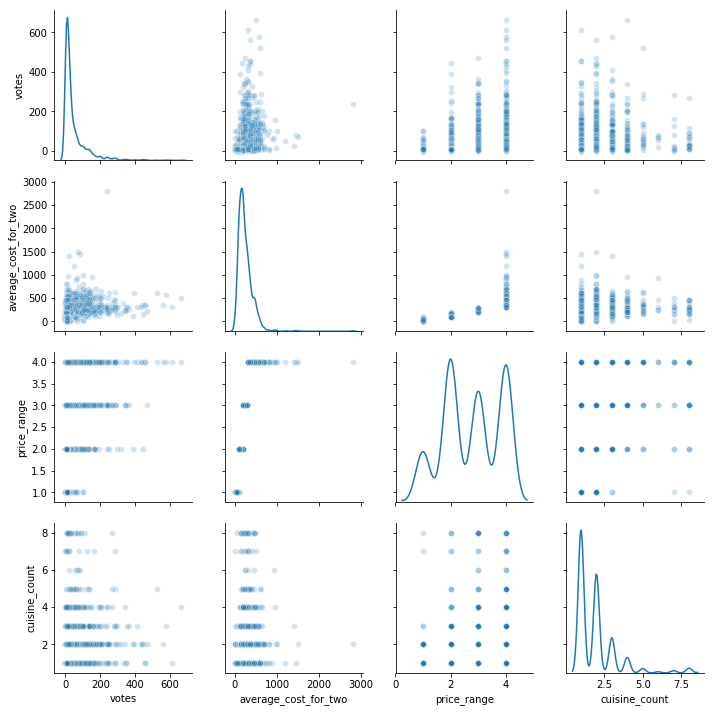

In [62]:
sns.pairplot(data[primary_fields], diag_kind='kde', plot_kws={'alpha': 0.2})

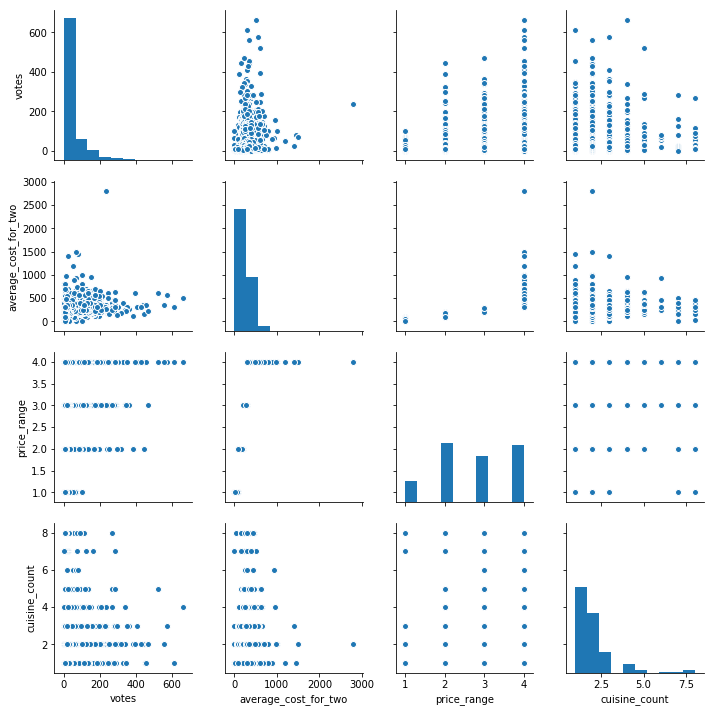

In [63]:
sns.pairplot(data[primary_fields], kind="scatter", palette="Set2")
plt.show()

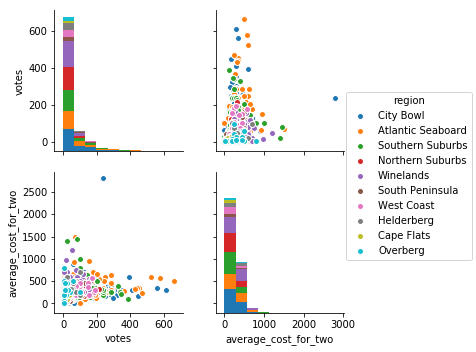

In [64]:
primary_fields = ['votes', 'average_cost_for_two', 'region']
sns.pairplot(data[primary_fields], kind="scatter", hue="region")
plt.show()

In [65]:
data[(data["average_cost_for_two"] > 2000)]

,name,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,cuisines,cuisine_count,places,locality,...,cuisine_Steak,cuisine_Street Food,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese
401,The Test Kitchen,4.7,Excellent,236,2800,4,"Continental, European",2,Old Biscuit Mill,Woodstock,...,0,0,0,0,0,0,0,0,0,0


In [66]:
data[data["region"] == "Atlantic Seaboard"]["aggregate_rating"].mean()

3.193488372093023

In [67]:
data.groupby("region")['aggregate_rating', 'votes','average_cost_for_two', 'price_range', 'cuisine_count'].agg('mean')


,aggregate_rating,votes,average_cost_for_two,price_range,cuisine_count
region,,,,,
Atlantic Seaboard,3.193488,78.506977,280.948837,2.911628,2.032558
Cape Flats,2.415000,13.450000,154.650000,2.100000,1.950000
City Bowl,3.270758,77.891697,257.404332,2.895307,2.036101
Helderberg,2.881034,19.517241,234.982759,2.724138,1.965517
Northern Suburbs,2.774627,29.875622,208.776119,2.601990,1.910448
Overberg,2.803571,13.607143,272.321429,3.000000,1.892857
South Peninsula,2.867647,42.735294,220.000000,2.588235,1.735294
Southern Suburbs,2.954955,49.873874,228.689189,2.653153,1.869369
West Coast,2.895775,38.169014,213.436620,2.676056,1.929577


In [68]:
data.pivot_table(['aggregate_rating', 'average_cost_for_two'], index=['region'], columns='cuisine_count', margins=True)

aggregate_rating                                          \
cuisine_count                    1         2         3         4         5   
region                                                                       
Atlantic Seaboard         2.931169  3.284946  3.355556  3.744444  3.500000   
Cape Flats                2.700000  1.975000  2.800000       NaN       NaN   
City Bowl                 3.159848  3.308333  3.556000  3.305882  3.762500   
Helderberg                2.992857  2.913333  2.562500  2.666667       NaN   
Northern Suburbs          2.621277  2.931667  2.796000  3.070588  2.675000   
Overberg                  2.883333  2.288889  3.200000  3.650000       NaN   
South Peninsula           2.464706  3.411111  3.112500       NaN       NaN   
Southern Suburbs          2.736000  3.083951  3.051852  3.500000  3.600000   
West Coast                2.644118  3.238462  2.420000  3.133333       NaN   
Winelands                 3.180597  3.387719  3.421739  3.250000  3.700000   
All                       2.925432  3.161086  3.158710  3.272464  3.473684   

                                                      average_cost_for_two  \
cuisine_count         6         7         8       All                    1   
region                                                                       
Atlantic Seaboard  3.80  3.100000  3.400000  3.193488           215.402597   
Cape Flats          NaN       NaN  2.600000  2.415000           130.000000   
City Bowl          3.95  2.966667  3.166667  3.270758           233.280303   
Helderberg          NaN       NaN  3.100000  2.881034           197.107143   
Northern Suburbs    NaN  2.600000       NaN  2.774627           178.361702   
Overberg            NaN       NaN       NaN  2.803571           249.166667   
South Peninsula     NaN       NaN       NaN  2.867647           171.764706   
Southern Suburbs    NaN  4.200000  3.633333  2.954955           192.160000   
West Coast          NaN       NaN  3.333333  2.895775           194.382353   
Winelands          4.20  2.200000  3.340000  3.259052           199.895522   
All                3.94  2.850000  3.290476  3.062887           203.069074   

                                                                          \
cuisine_count               2           3           4           5      6   
region                                                                     
Atlantic Seaboard  281.322581  348.148148  498.333333  538.333333  615.0   
Cape Flats         167.875000  165.000000         NaN         NaN    NaN   
City Bowl          271.154762  291.000000  302.764706  247.500000  250.0   
Helderberg         242.666667  266.250000  315.000000         NaN    NaN   
Northern Suburbs   221.383333  261.000000  235.294118  285.000000    NaN   
Overberg           276.111111  273.000000  392.500000         NaN    NaN   
South Peninsula    251.111111  287.500000         NaN         NaN    NaN   
Southern Suburbs   242.074074  317.962963  247.777778  320.000000    NaN   
West Coast         216.346154  310.000000  266.666667         NaN    NaN   
Winelands          361.666667  329.130435  243.333333  354.666667  450.0   
All                266.513575  303.419355  301.405797  322.052632  436.0   

                                                       
cuisine_count               7           8         All  
region                                                 
Atlantic Seaboard  150.000000  312.500000  280.948837  
Cape Flats                NaN  250.000000  154.650000  
City Bowl          300.000000  321.500000  257.404332  
Helderberg                NaN  450.000000  234.982759  
Northern Suburbs   250.000000         NaN  208.776119  
Overberg                  NaN         NaN  272.321429  
South Peninsula           NaN         NaN  220.000000  
Southern Suburbs   150.000000  220.000000  228.689189  
West Coast                NaN  190.000000  213.436620  
Winelands          333.333333  258.000000  259.633621  
All                260.000000  274.9523

In [69]:
pd.crosstab(data.region, data.cuisine_count, margins=True)

cuisine_count,1,2,3,4,5,6,7,8,All
region,,,,,,,,,
Atlantic Seaboard,77,93,27,9,3,2,2,2,215
Cape Flats,9,8,2,0,0,0,0,1,20
City Bowl,132,84,25,17,8,2,3,6,277
Helderberg,28,15,8,6,0,0,0,1,58
Northern Suburbs,94,60,25,17,4,0,1,0,201
Overberg,12,9,5,2,0,0,0,0,28
South Peninsula,17,9,8,0,0,0,0,0,34
Southern Suburbs,100,81,27,9,1,0,1,3,222
West Coast,34,26,5,3,0,0,0,3,71


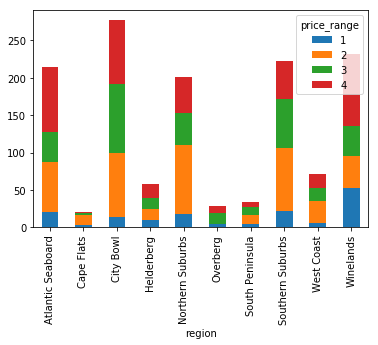

In [103]:
pd.crosstab(data.region, data.price_range, margins=False).plot.bar(stacked=True)

In [108]:
pd.crosstab(data.region, data.price_range, margins=False, normalize="columns")

price_range,1,2,3,4
region,,,,
Atlantic Seaboard,0.129032,0.152273,0.117302,0.208531
Cape Flats,0.019355,0.029545,0.008798,0.002370
City Bowl,0.090323,0.195455,0.269795,0.201422
Helderberg,0.064516,0.034091,0.041056,0.045024
Northern Suburbs,0.116129,0.209091,0.126100,0.113744
Overberg,0.025806,0.002273,0.041056,0.021327
South Peninsula,0.032258,0.025000,0.032258,0.016588
Southern Suburbs,0.141935,0.190909,0.190616,0.120853
West Coast,0.038710,0.065909,0.052786,0.042654


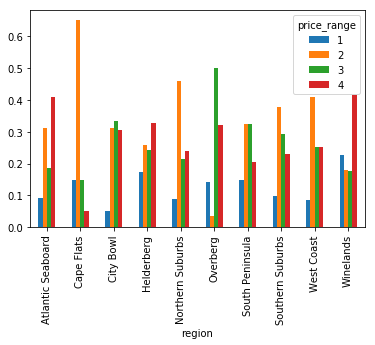

In [109]:
pd.crosstab(data.region, data.price_range, margins=False, normalize="index").plot.bar()

In [102]:
pd.crosstab([data.region, data.price_range], data.cuisine_count, margins=True)

cuisine_count                    1    2    3   4   5  6   7   8   All
region            price_range                                        
Atlantic Seaboard 1              8   10    1   0   0  0   1   0    20
                  2             33   29    4   1   0  0   0   0    67
                  3             15   19    4   1   0  0   0   1    40
                  4             21   35   18   7   3  2   1   1    88
Cape Flats        1              1    2    0   0   0  0   0   0     3
                  2              6    5    2   0   0  0   0   0    13
                  3              2    0    0   0   0  0   0   1     3
                  4              0    1    0   0   0  0   0   0     1
City Bowl         1              8    6    0   0   0  0   0   0    14
                  2             43   28    9   1   3  0   1   1    86
                  3             49   24    4   8   2  2   1   2    92
                  4             32   26   12   8   3  0   1   3    85
Helderberg        1              8    2    0   0   0  0   0   0    10
                  2              7    4    3   1   0  0   0   0    15
                  3              8    5    1   0   0  0   0   0    14
                  4              5    4    4   5   0  0   0   1    19
Northern Suburbs  1             10    8    0   0   0  0   0   0    18
                  2             55   26   10   1   0  0   0   0    92
                  3             15   11    1  13   2  0   1   0    43
                  4             14   15   14   3   2  0   0   0    48
Overberg          1              3    1    0   0   0  0   0   0     4
                  2              0    1    0   0   0  0   0   0     1
                  3              4    5    4   1   0  0   0   0    14
                  4              5    2    1   1   0  0   0   0     9
South Peninsula   1              4    1    0   0   0  0   0   0     5
                  2              6    3    2   0   0  0   0   0    11
                  3              6    2    3   0   0  0   0   0    11
                  4              1    3    3   0   0  0   0   0     7
Southern Suburbs  1             13    9    0   0   0  0   0   0    22
                  2             48   24    9   1   0  0   1   1    84
                  3             25   27    5   6   0  0   0   2    65
                  4             14   21   13   2   1  0   0   0    51
West Coast        1              4    2    0   0   0  0   0   0     6
                  2             19    8    1   0   0  0   0   1    29
                  3              3   10    1   2   0  0   0   2    18
                  4              8    6    3   1   0  0   0   0    18
Winelands         1             48    3    1   0   0  0   0   1    53
                  2             37    4    1   0   0  0   0   0    42
                  3             15   12    7   6   0  0   0   1    41
                  4             34   38   14   0   3  1   3   3    96
All                            637  442  155  69  19  5  10  21  1358

In [72]:
pd.crosstab([data.locality], data.region, margins=True)

region,Atlantic Seaboard,Cape Flats,City Bowl,Helderberg,Northern Suburbs,Overberg,South Peninsula,Southern Suburbs,West Coast,Winelands,All
locality,,,,,,,,,,,
Athlone,0,8,0,0,0,0,0,0,0,0,8
Bay Area,0,0,0,0,0,0,7,0,0,0,7
Bellville,0,0,0,0,49,0,0,0,0,0,49
Bergvliet,0,0,0,0,0,0,0,3,0,0,3
Bloubergstrand,0,0,0,0,0,0,0,0,13,0,13
Brackenfell,0,0,0,0,19,0,0,0,0,0,19
CBD,0,0,143,0,0,0,0,0,0,0,143
Camps Bay,21,0,0,0,0,0,0,0,0,0,21
Cape Town International Airport,0,0,0,0,6,0,0,0,0,0,6


In [73]:
quartiles = pd.qcut(data['average_cost_for_two'], q=[0, .4, .8, .97, 1.], labels=['R0 - R180', 'R180 - R350', 'R350 - R600', 'R600+'])
grouped = data.groupby(['region', quartiles], as_index=True)

rating_functions = ['mean', 'std']
vote_functions = ['mean', 'std']

fields = {}
fields['average_cost_for_two'] = ['mean', 'std']
fields['aggregate_rating'] = rating_functions
fields['cuisine_count'] = 'mean'
fields['votes'] = vote_functions
for c in data.columns:
    if c.startswith('cuisine_') and c != 'cuisine_count':
        fields[c] = 'sum'

grouped_data = grouped.agg(fields)
grouped_data

average_cost_for_two              \
                                                       mean         std   
region            average_cost_for_two                                    
Atlantic Seaboard R0 - R180                      114.195402   44.427060   
                  R180 - R350                    264.696970   51.222582   
                  R350 - R600                    472.918367   66.378284   
                  R600+                          755.846154  250.978368   
Cape Flats        R0 - R180                      121.875000   47.500000   
                  R180 - R350                    223.333333   25.166115   
                  R350 - R600                    473.000000         NaN   
City Bowl         R0 - R180                      133.010204   44.921121   
                  R180 - R350                    247.929688   44.842363   
                  R350 - R600                    453.478261   60.178157   
                  R600+                         1134.200000  937.237003   
Helderberg        R0 - R180                      108.800000   40.959329   
                  R180 - R350                    267.083333   51.792157   
                  R350 - R600                    474.875000   58.762081   
                  R600+                          700.000000         NaN   
Northern Suburbs  R0 - R180                      127.201835   37.214538   
                  R180 - R350                    272.960526   57.429247   
                  R350 - R600                    450.200000   67.864571   
                  R600+                          601.000000         NaN   
Overberg          R0 - R180                       60.000000   28.284271   
                  R180 - R350                    245.588235   40.730914   
                  R350 - R600                    470.000000   27.386128   
                  R600+                          800.000000         NaN   
South Peninsula   R0 - R180                      128.750000   41.089334   
                  R180 - R350                    242.307692   36.549931   
                  R350 - R600                    454.000000   45.607017   
Southern Suburbs  R0 - R180                      121.153846   43.779183   
                  R180 - R350                    255.478723   54.585777   
                  R350 - R600                    466.263158   75.883567   
                  R600+                         1059.000000  357.463285   
West Coast        R0 - R180                      123.235294   39.598025   
                  R180 - R350                    258.793103   50.100883   
                  R350 - R600                    432.375000   67.205309   
Winelands         R0 - R180                       84.308511   40.947127   
                  R180 - R350                    276.282051   52.523562   
                  R350 - R600                    469.019231   65.941296   
                  R600+                          796.375000  197.627310   

                                       aggregate_rating            \
                                                   mean       std   
region            average_cost_for_two                              
Atlantic Seaboard R0 - R180                    2.787356  1.215004   
                  R180 - R350                  3.368182  0.790552   
                  R350 - R600                  3.508163  0.585177   
                  R600+                        3.838462  0.433087   
Cape Flats        R0 - R180                    2.400000  0.954289   
                  R180 - R350                  2.500000  0.100000   
                  R350 - R600                  2.400000       NaN   
City Bowl         R0 - R180                    3.054082  1.033777   
                  R180 - R350                  3.303906  1.054753   
                  R350 - R600                  3.563043  0.789193   
                  R600+                        3.980000  0.637966   
Helderberg        R0 - R180                    2.672000  1.239126   
   

In [74]:
grouped_data['average_cost_for_two']['mean']

region             average_cost_for_two
Atlantic Seaboard  R0 - R180                114.195402
                   R180 - R350              264.696970
                   R350 - R600              472.918367
                   R600+                    755.846154
Cape Flats         R0 - R180                121.875000
                   R180 - R350              223.333333
                   R350 - R600              473.000000
City Bowl          R0 - R180                133.010204
                   R180 - R350              247.929688
                   R350 - R600              453.478261
                   R600+                   1134.200000
Helderberg         R0 - R180                108.800000
                   R180 - R350              267.083333
                   R350 - R600              474.875000
                   R600+                    700.000000
Northern Suburbs   R0 - R180                127.201835
                   R180 - R350              272.960526
                   R350 -

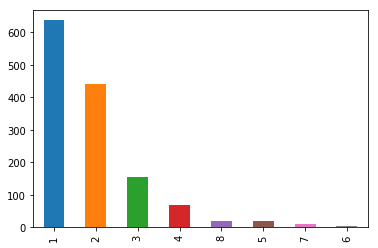

In [75]:
data["cuisine_count"].value_counts().plot.bar()

# EDA Based on Think Stats 2e
_____

## Exploring Distributions and Summary Statistics

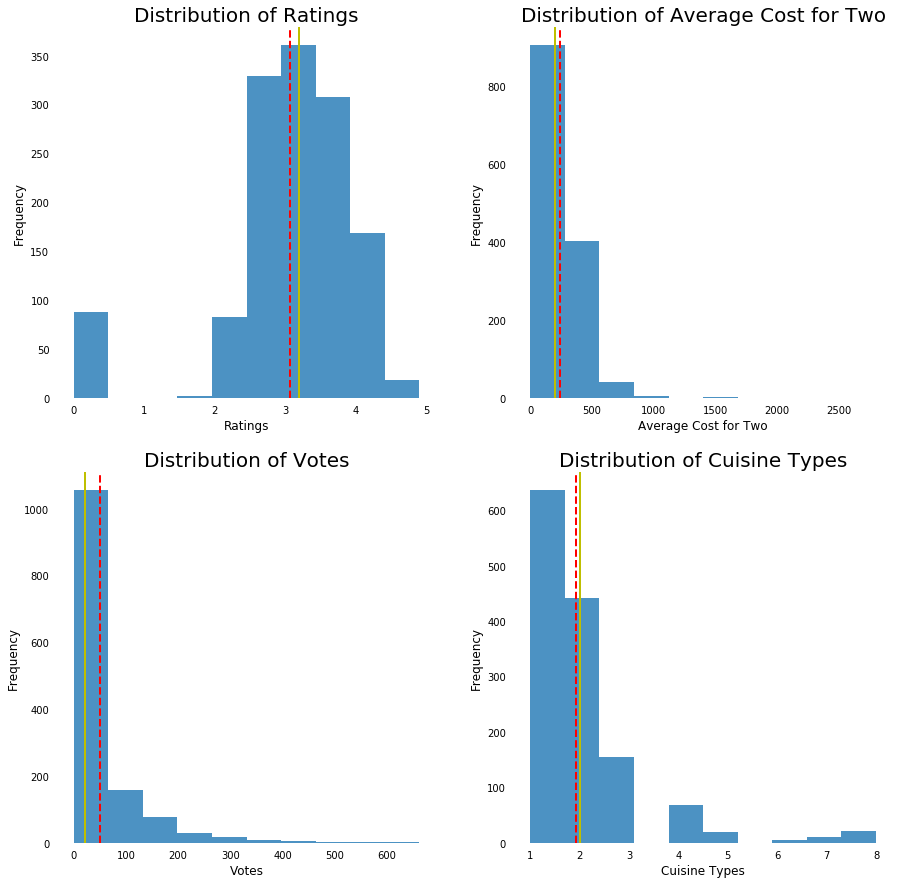

In [76]:
col = ["aggregate_rating", "average_cost_for_two", "votes", "cuisine_count"]
labels = ["Ratings", "Average Cost for Two", "Votes", "Cuisine Types"]

fig = plt.figure(figsize=(15, 15))
for r in range(0,len(col)):
    ax = fig.add_subplot(2, 2, r+1)
    ax = data[col[r]].plot(kind='hist', alpha=0.8)
    ax.axvline(data[col[r]].mean(), color='r', linestyle='dashed', linewidth=2)
    ax.axvline(data[col[r]].median(), color='y', linestyle='solid', linewidth=2)
    ax.set_title("Distribution of " + labels[r], fontsize=20)
    ax.set_xlabel(labels[r], fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    for key, spine in ax.spines.items():
        spine.set_visible(False)

In [77]:
data[col].describe()

,aggregate_rating,average_cost_for_two,votes,cuisine_count
count,1358.000000,1358.000000,1358.000000,1358.000000
mean,3.062887,244.222386,49.971281,1.932990
std,0.982128,175.852326,75.411521,1.307228
min,0.000000,0.000000,0.000000,1.000000
25%,2.700000,140.000000,8.000000,1.000000
50%,3.200000,200.000000,22.000000,2.000000
75%,3.700000,300.000000,58.000000,2.000000
max,4.900000,2800.000000,662.000000,8.000000


In [78]:
data[col].median()

aggregate_rating          3.2
average_cost_for_two    200.0
votes                    22.0
cuisine_count             2.0
dtype: float64

The majority of ratings lie between 2.5 and 3.5 with a mode of 3. The left tail is longer than the right, as expected since rating are capped at 5 and there are many restaurants with low scores. We can expect most restaurants to score in the 2 to 4 range based on the standard deviation however we must bear in mind that at present, there is no seperation in the data between establishments that serve full meals and drinks only. We will split the data later to get more accurate statstics. 

The average cost for two is right skewed with the majority of restaurants charging up to R250 for two people and a few charging in excess of R500. Given there are a number of fine-dining restaurants in Cape Town, we expect the top-end establishments to skew the mean slightly, so the median of R200 is a more accurate reeflection of the central cost for two people. The majority of restaurants will charge between R69 and R419 based on the standard deviation. It will be useful to break down these statistics by region, suburb and cuisine type later and see how these correlate with the overall rating. Zomato provides a price range variable which we have access to in the data set, however its not clear what defines the range of this parameter and whether its country-dependant, so we will work with raw the average costs for two for the most part and create cost ranges that make sense for a South African context. 

Most restaurants received between 0 and 50 votes and this tails off to the right. Zomato doesn't make the vote algoirthm publically available but it believed to be a weighted score whereby the vote of users' with more followers counts for more than those with less. This presumably would influence the aggregate rating of restaurants as well. The median vote count is 22 votes per restaurant with the bulk receiving 0 to 124 votes. 

Most restaurants serve 1 or 2 cuisine types while a few serve as many as 8 types. It will be interesting to investigate whether number of cuisine types influences ratings and if there is a correclation between more "mass-amrket" restaurants that serve a bit of everything and location. One might expect to see more of these restaurants in shopping malls and public places. 

## Investigating Outliers



It seems likely there will be number of restaurants which have no ratings due to lack of votes. We need to decide whether these should be removed from the analysis. Let's study outlying values to make a decision. 

In [79]:
data[col].describe()

,aggregate_rating,average_cost_for_two,votes,cuisine_count
count,1358.000000,1358.000000,1358.000000,1358.000000
mean,3.062887,244.222386,49.971281,1.932990
std,0.982128,175.852326,75.411521,1.307228
min,0.000000,0.000000,0.000000,1.000000
25%,2.700000,140.000000,8.000000,1.000000
50%,3.200000,200.000000,22.000000,2.000000
75%,3.700000,300.000000,58.000000,2.000000
max,4.900000,2800.000000,662.000000,8.000000


In [80]:
data[data["average_cost_for_two"] > 2000]

,name,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,cuisines,cuisine_count,places,locality,...,cuisine_Steak,cuisine_Street Food,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese
401,The Test Kitchen,4.7,Excellent,236,2800,4,"Continental, European",2,Old Biscuit Mill,Woodstock,...,0,0,0,0,0,0,0,0,0,0


In [81]:
data[data["aggregate_rating"] == 0]

,name,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,cuisines,cuisine_count,places,locality,...,cuisine_Steak,cuisine_Street Food,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese
72,Ice Cream & Fresh Juice,0.0,Not rated,1,0,1,Desserts,1,None,Sea Point,...,0,0,0,0,0,0,0,0,0,0
73,Wakaberry,0.0,Not rated,3,80,1,Desserts,1,None,Strand,...,0,0,0,0,0,0,0,0,0,0
74,For The Love Of Yummyness,0.0,Not rated,3,100,2,Desserts,1,None,Stellenbosch,...,0,0,0,0,0,0,0,0,0,0
75,Sorbetiere,0.0,Not rated,2,60,1,Ice Cream,1,None,Woodstock,...,0,0,0,0,0,0,0,0,0,0
76,Bonjour Bakery,0.0,Not rated,3,120,2,"Bakery, Desserts",2,None,Sea Point,...,0,0,0,0,0,0,0,0,0,0
77,Cinnabon,0.0,Not rated,3,100,2,Desserts,1,Capegate Shopping Center,Brackenfell,...,0,0,0,0,0,0,0,0,0,0
78,Gelato Mania,0.0,Not rated,2,100,2,"Desserts, Ice Cream",2,None,Somerset West,...,0,0,0,0,0,0,0,0,0,0
79,SoYogi,0.0,Not rated,1,120,2,Frozen Yogurt,1,None,Franschhoek,...,0,0,0,0,0,0,0,0,0,0
80,Smooch,0.0,Not rated,1,80,1,"Ice Cream, Desserts",2,None,Athlone,...,0,0,0,0,0,0,0,0,0,0
81,Filo Yoghurt,0.0,Not rated,3,100,2,"Ice Cream, Desserts",2,None,Sea Point,...,0,0,0,0,0,0,0,0,0,0


In [82]:
data[data["aggregate_rating"] == 0]["cuisines"].value_counts()

Drinks Only                                                                         16
Desserts                                                                            13
Bakery                                                                               5
Bakery, Desserts                                                                     4
Beverages                                                                            4
Cafe, Bakery                                                                         4
Ice Cream, Desserts                                                                  3
Desserts, Ice Cream                                                                  3
Finger Food                                                                          3
Patisserie, Cafe                                                                     2
Cafe                                                                                 2
American                                   

In [83]:
data[data["votes"] == 0]

,name,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,cuisines,cuisine_count,places,locality,...,cuisine_Steak,cuisine_Street Food,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese
88,Beijo,0.0,Not rated,0,60,1,"Brazilian, Desserts",2,None,Woodstock,...,0,0,0,0,0,0,0,0,0,0
89,Caldo & Freddo,0.0,Not rated,0,80,1,Desserts,1,None,Sea Point,...,0,0,0,0,0,0,0,0,0,0
90,Doughnut Hive,0.0,Not rated,0,50,1,"Bakery, Desserts",2,Grandwest Casino,Goodwood,...,0,0,0,0,0,0,0,0,0,0
91,DV Café,0.0,Not rated,0,50,1,"Desserts, Cafe, Ice Cream",3,Spice Route Farm,Paarl,...,0,0,0,0,0,0,0,0,0,0
92,Yogi Bar,0.0,Not rated,0,120,2,Desserts,1,Sandown Retail Crossing Center,Parklands,...,0,0,0,0,0,0,0,0,0,0
93,Marcel's Frozen Yoghurt,0.0,Not rated,0,100,2,Desserts,1,Zevenwacht Mall,Kuils River,...,0,0,0,0,0,0,0,0,0,0
94,Gelato,0.0,Not rated,0,80,1,Ice Cream,1,None,Simon's Town,...,0,0,0,0,0,0,0,0,0,0
95,Lili's Ice Cream Parlor,0.0,Not rated,0,60,1,"Desserts, Ice Cream",2,None,Plumstead,...,0,0,0,0,0,0,0,0,0,0
96,Marcel's Frozen Yoghurt,0.0,Not rated,0,100,2,Desserts,1,Mountain Mill Centre,Worcester,...,0,0,0,0,0,0,0,0,0,0
97,Ice Rock Cafe,0.0,Not rated,0,90,1,Desserts,1,None,Fish Hoek,...,0,0,0,0,0,0,0,0,0,0


In [84]:
data[data["votes"] == 0]["cuisines"].value_counts()

Drinks Only                                                                         9
Desserts                                                                            6
Beverages                                                                           2
Finger Food                                                                         2
Desserts, Ice Cream                                                                 2
Patisserie, Cafe                                                                    2
Healthy Food, Mediterranean                                                         1
Street Food, South African, Contemporary                                            1
Bakery, Desserts                                                                    1
Cafe, Bakery, Desserts                                                              1
Healthy Food                                                                        1
Cafe, Deli, Bakery, Healthy Food                      

We have a single restaurant with a very high average cost for two, however this partciualr establishment is known to be a top 20 restaurant and its prices are not unexpected. Thus we will keep it in the dataset although it will influence the mean slightly. 

We have 88 restaurants with an aggregate rating of 0 and 42 resraurants with no votes at all. The majority of these establishments serve only drinks, desserts or ice-cream. We might want to split our data into two sets: drink-only establishments and restaurants that serve full meals. I will keep the dessert/ice-cream establishments in the main dataset as it will be useful to find trends relative to full-meal establishments. In addition, restaurants that have 0 votes or 0 rating may give us useful info about why customers don't want to vote on certain establishments.

If a restaurant serves additional cuisine types to "Drinks Only", then it will stay in the main data set. 

## Exploring PMF and CDF's

## Separating Full-meal and Drinks-Only establishments

In [85]:
drinks_data = data[data["cuisines"] == "Drinks Only"]
drinks_data

,name,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,cuisines,cuisine_count,places,locality,...,cuisine_Steak,cuisine_Street Food,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese
373,Stones,2.9,Average,5,150,2,Drinks Only,1,Palm Grove Center,Durbanville,...,0,0,0,0,0,0,0,0,0,0
374,Fat Cats,2.9,Average,5,120,2,Drinks Only,1,None,Strand,...,0,0,0,0,0,0,0,0,0,0
375,Barts Tavern,2.9,Average,4,100,2,Drinks Only,1,None,Strand,...,0,0,0,0,0,0,0,0,0,0
376,The Nameless Pub,2.9,Average,4,120,2,Drinks Only,1,None,Somerset West,...,0,0,0,0,0,0,0,0,0,0
381,Winners Sports Pub,2.9,Average,4,150,2,Drinks Only,1,Parklands Center,Table View,...,0,0,0,0,0,0,0,0,0,0
386,Banned Rock Lounge,2.8,Average,10,150,2,Drinks Only,1,None,Table View,...,0,0,0,0,0,0,0,0,0,0
392,Two And Sixpence Tavern,2.7,Average,8,120,2,Drinks Only,1,None,Simon's Town,...,0,0,0,0,0,0,0,0,0,0
602,The Gin Bar,4.3,Very Good,63,250,3,Drinks Only,1,None,CBD,...,0,0,0,0,0,0,0,0,0,0
604,Fairview Tasting Room,4.1,Very Good,44,100,2,Drinks Only,1,None,Paarl,...,0,0,0,0,0,0,0,0,0,0
608,Waterford Wine Estate,4.0,Very Good,23,100,2,Drinks Only,1,None,Stellenbosch,...,0,0,0,0,0,0,0,0,0,0


In [86]:
meal_data = data[data["cuisines"] != "Drinks Only"]
meal_data

,name,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,cuisines,cuisine_count,places,locality,...,cuisine_Steak,cuisine_Street Food,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese
0,Moro Gelato,4.8,Excellent,67,80,1,"Desserts, Ice Cream",2,None,CBD,...,0,0,0,0,0,0,0,0,0,0
1,Unframed Ice Cream,4.7,Excellent,102,40,1,Ice Cream,1,None,Gardens,...,0,0,0,0,0,0,0,0,0,0
2,The Velvet Cake Co.,4.6,Excellent,87,165,2,"Bakery, Desserts",2,None,CBD,...,0,0,0,0,0,0,0,0,0,0
3,My Sugar,4.5,Excellent,195,125,2,"Cafe, Patisserie, Bakery, Desserts",4,None,Sea Point,...,0,0,0,0,0,0,0,0,0,0
4,The Creamery,4.5,Excellent,388,110,2,"Desserts, Ice Cream",2,None,Newlands,...,0,0,0,0,0,0,0,0,0,0
5,The Velvet Cake Co.,4.4,Very Good,126,160,2,"Cafe, Desserts, Bakery",3,None,Bellville,...,0,0,0,0,0,0,0,0,0,0
6,The Creamery,4.2,Very Good,110,110,2,"Desserts, Ice Cream",2,None,Green Point,...,0,0,0,0,0,0,0,0,0,0
7,The Creamery,4.1,Very Good,44,75,1,"Desserts, Ice Cream",2,None,Claremont,...,0,0,0,0,0,0,0,0,0,0
8,Myog,4.1,Very Good,86,100,2,Desserts,1,None,Gardens,...,0,0,0,0,0,0,0,0,0,0
9,Baskin Robbins,3.9,Good,38,80,1,"Ice Cream, Desserts",2,Canal Walk Mall,Century City,...,0,0,0,0,0,0,0,0,0,0


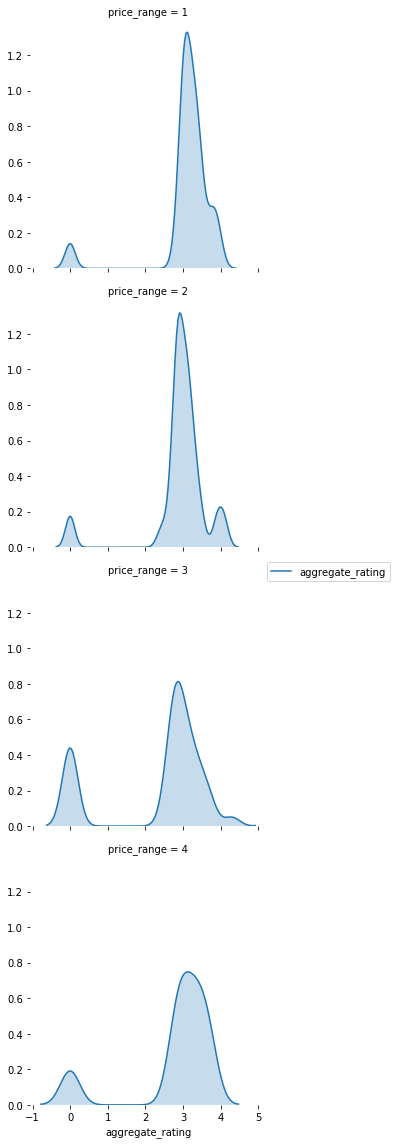

In [87]:
g = sns.FacetGrid(drinks_data, row="price_range" ,size=4)
g = (g.map(sns.kdeplot, "aggregate_rating", shade=True)).add_legend()
sns.despine(left=True, bottom=True)
plt.show()

## Breaking Down Meal and Drinks Only Restaurants by Region

In [88]:
region_meal_data = meal_data.groupby("region")[col].agg('mean')
region_meal_data

,aggregate_rating,average_cost_for_two,votes,cuisine_count
region,,,,
Atlantic Seaboard,3.210784,284.823529,82.068627,2.088235
Cape Flats,2.415000,154.650000,13.450000,1.950000
City Bowl,3.388525,265.372951,86.983607,2.176230
Helderberg,2.875000,263.729167,21.833333,2.166667
Northern Suburbs,2.775661,214.624339,31.243386,1.968254
Overberg,2.878261,305.869565,15.521739,2.086957
South Peninsula,2.867742,223.548387,46.322581,1.806452
Southern Suburbs,2.966029,232.842105,52.172249,1.923445
West Coast,2.980000,222.984615,41.153846,2.015385


In [89]:
region_drinks_data = drinks_data.groupby("region")[col].agg('mean')
region_drinks_data

,aggregate_rating,average_cost_for_two,votes,cuisine_count
region,,,,
Atlantic Seaboard,2.872727,209.090909,12.454545,1.0
City Bowl,2.400000,198.484848,10.666667,1.0
Helderberg,2.910000,97.000000,8.400000,1.0
Northern Suburbs,2.758333,116.666667,8.333333,1.0
Overberg,2.460000,118.000000,4.800000,1.0
South Peninsula,2.866667,183.333333,5.666667,1.0
Southern Suburbs,2.776923,161.923077,12.923077,1.0
West Coast,1.983333,110.000000,5.833333,1.0
Winelands,3.200000,88.028169,11.450704,1.0


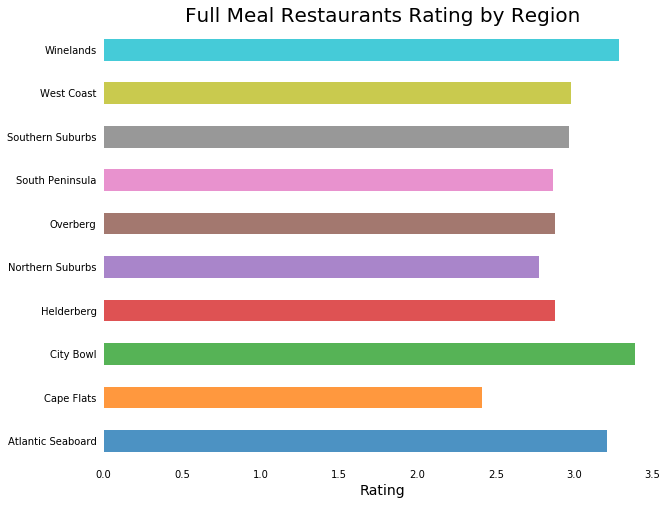

In [90]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
ax = region_meal_data["aggregate_rating"].plot.barh(alpha=0.8)
ax.set_title(label="Full Meal Restaurants Rating by Region", fontsize=20)
ax.tick_params(bottom=False, top=False, left=False, right=False)
for key, spine in ax.spines.items():
    spine.set_visible(False)
ax.set_xlabel("Rating", fontsize=14)
ax.yaxis.label.set_visible(False)

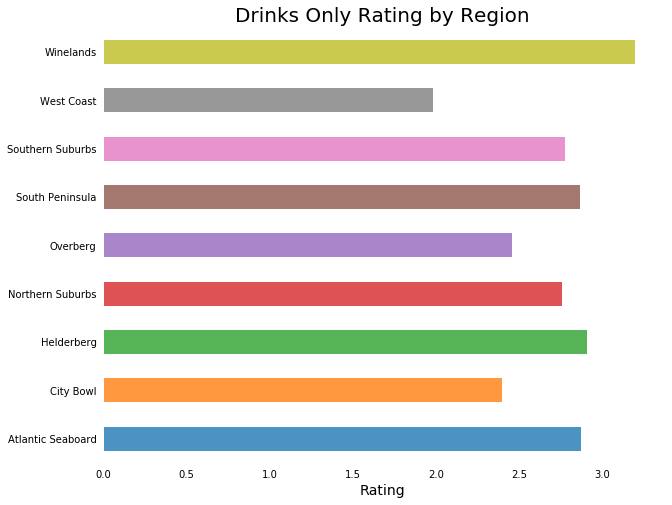

In [91]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
ax = region_drinks_data["aggregate_rating"].plot.barh(alpha=0.8)
ax.set_title(label="Drinks Only Rating by Region", fontsize=20)
ax.tick_params(bottom=False, top=False, left=False, right=False)
for key, spine in ax.spines.items():
    spine.set_visible(False)
ax.set_xlabel("Rating", fontsize=14)
ax.yaxis.label.set_visible(False)


#for p in ax.patches:
#    ax.annotate(s=str(p.get_width().round(decimals=1)), xy=(p.get_width() * 0.94, p.get_y() * 1.03))

NameError: name 'region_data' is not defined

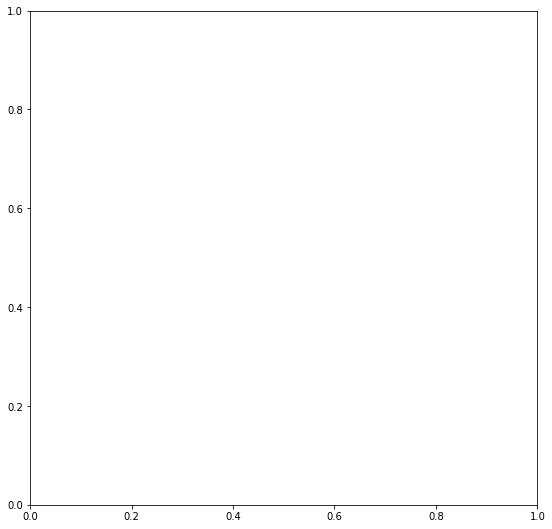

In [92]:
col = ["aggregate_rating", "average_cost_for_two", "votes", "cuisine_count"]
labels = ["Aggregate Rating", "Average Cost for Two", "Votes", "Cuisine Types"]

fig = plt.figure(figsize=(20, 20))
for r in range(0,len(col)):
    ax = fig.add_subplot(2, 2, r+1)
    ax = region_data[col[r]].plot.barh(rot=40, alpha=0.8)
    ax.set_title(label=labels[r] + " By Region", fontsize=20)
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlabel(labels[r], fontsize=14)
    ax.yaxis.label.set_visible(False)

# Conclusions and Next Steps
-----

In [ ]:
data_by_region = data.groupby("region", as_index=False).agg('mean')
data_by_region

In [ ]:
from bokeh.io import show
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LogColorMapper
)
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure

palette.reverse()

color_mapper = LogColorMapper(palette=palette)

source = ColumnDataSource(data=dict(
    x=data["longitude"],
    y=data["latitude"],
    name=data["name"],
    rate=data["aggregate_rating"]
))

TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(
    title="Cape Town Restaurant Ratings, 2018", tools=TOOLS,
    x_axis_location=None, y_axis_location=None
)
p.grid.grid_line_color = None

p.patches('x', 'y', source=source,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Name", "@name"),
    ("Rating)", "@rate"),
    ("(Long, Lat)", "($x, $y)"),
]

show(p)